<a href="https://colab.research.google.com/github/Adetowobola/A_B-Testing/blob/main/Mini_Project_5A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hypothesis testing on e-commerce data set: A statistical approach using AB/Testing
A/B testing, also known as split testing, is a widely used experimental method for evaluating the effectiveness of two different variants, e.g. of websites, emails or adverts, by comparing key performance indicators such as the conversion rate or click-through rate (CTR). This method is essential in digital marketing and data-driven decision-making.

In this study, A/B testing was used to compare user responses to two conditions: an experimental group that received targeted advertising and a control group that received either a public service announcement or no intervention. The key metric was the conversion rate, defined as the number of conversions per number of Total users.

Objectives:

-Analyze the experimental and control groups to determine if the ads were successful


-Estimate the potential revenue generated from the ads


-Assess the statistical significance of the differences between the groups using A/B testing techniques

Goals:


1. Evaluate the effectiveness of marketing adverts (experimental) compared to the control group using the A/B test method.
2. To quantify the impact of marketing measures on user behavior, particularly with regard to the conversion rate
3. Determine the impact of marketing on business outcomes, such as revenue generation and return on investment (ROI).
A/B testing provides important insights into consumer behavior and can be used in various industries such as retail, healthcare, finance and travel.


In [ ]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import chi2_contingency

#Data Loading

In [ ]:
#loading marketing data
marketing_data = pd.read_csv("/content/drive/MyDrive/marketing_AB.csv")

In [ ]:
#viewing the first 5 rows of data
marketing_data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
#viewing the last 5 rows of data
marketing_data.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [ ]:
#viewing the number of rows and columns of data
marketing_data.shape

(588101, 7)

In [ ]:
#viewing the column names
marketing_data.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [ ]:
#viewing the information of data such as datatype
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


#Data Cleaning

from the above information, Data has no misssing values

In [ ]:
#verifying if there are duplicates values
marketing_data.duplicated().sum()

np.int64(0)

From the above information, there are no duplicate values in the data

In [ ]:
#dropping unneccessary column
marketing_data.drop(["Unnamed: 0", "user id"], axis=1, inplace=True)

In [ ]:
#renaming columns
marketing_data.columns = marketing_data.columns.str.strip().str.replace(" ","_")
marketing_data.columns

Index(['test_group', 'converted', 'total_ads', 'most_ads_day',
       'most_ads_hour'],
      dtype='object')

#Data Exploration

In [ ]:
#statistical measures
marketing_data.describe(include=["number"])

,total_ads,most_ads_hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


I didnt use select dtypes for category and numerical data as converted(bool) will not be  captured in category as it is not an object and also most_ads_hour(time) will be captured as an integer instead of category. Also, i dont need user_id, not included as it may be captured as integer

In [ ]:
#creating a new column conversion from converted so as to change binary column to integer and maintaining the old column converteda
marketing_data["conversion"] = marketing_data["converted"].astype(int)

In [ ]:
marketing_data.head()


,test_group,converted,total_ads,most_ads_day,most_ads_hour,conversion
0,ad,False,130,Monday,20,0
1,ad,False,93,Tuesday,22,0
2,ad,False,21,Tuesday,18,0
3,ad,False,355,Tuesday,10,0
4,ad,False,276,Friday,14,0


In [ ]:
#seperate into categorical and numerical data
categorical_data = marketing_data[["test_group", "converted", "most_ads_day", "most_ads_hour"]]

numerical_data = marketing_data[["total_ads", "conversion"]]

In [ ]:
categorical_data

,test_group,converted,most_ads_day,most_ads_hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14
...,...,...,...,...
588096,ad,False,Tuesday,23
588097,ad,False,Tuesday,23
588098,ad,False,Tuesday,23
588099,ad,False,Tuesday,23


In [ ]:
numerical_data

,total_ads,conversion
0,130,0
1,93,0
2,21,0
3,355,0
4,276,0
...,...,...
588096,1,0
588097,1,0
588098,3,0
588099,1,0


In [ ]:
for col in categorical_data.columns:
  print(col, ":", categorical_data[col].unique(), "---->", categorical_data[col].nunique())

test_group : ['ad' 'psa'] ----> 2
converted : [False  True] ----> 2
most_ads_day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday'] ----> 7
most_ads_hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5] ----> 24


In [ ]:
#no of users that bought vs those that did not buy after been exposed to either control(psa or nothing) or experimental group(advertisement)
marketing_data.groupby("test_group")["converted"].value_counts()

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64


where ad(advertisement)== experimental group


psa(public service announcement or nothing)== control group


converted-

True--user bought the product

False-user did not buy the product

Visualising the number of users that purchased vs those that did not purchase after been exposed to either control(psa) or experimental group(advertisement)

In [ ]:
#total number of ads seen by either the experimental or control group
marketing_data.groupby("test_group")["total_ads"].sum()

,total_ads
test_group,
ad,14014701
psa,582481


In [ ]:
#Total purchase made by either experimental group or control group
marketing_data.groupby("test_group")["conversion"].sum()

,conversion
test_group,
ad,14423
psa,420


In [ ]:
#Average purchase made by either experimental group or control group
marketing_data.groupby("test_group")["conversion"].mean()

,conversion
test_group,
ad,0.025547
psa,0.017854


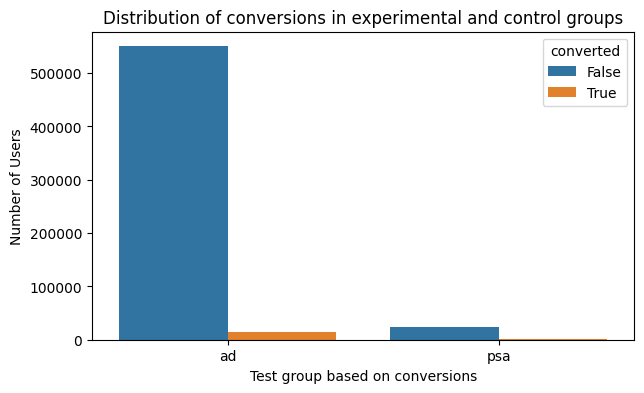

In [ ]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="test_group", hue="converted", data =marketing_data)
plt.title("Distribution of conversions in experimental and control groups")
plt.xlabel("Test group based on conversions")
plt.ylabel("Number of Users")

plt.show()


Out of the Total no of users (564577) that were exposed to the experimental group(i.e saw the advertisement), only (14,423) bought the product while (550154) did not buy.

For the control group, out of the Total no of users(23524) exposed to the control group(i.e saw the public service announcement or nothing), (23104) did not buy while only (420) bought.



#Non Visual analysis of Categorical data/discrete data

In [ ]:
def discrete_uni_analysis(categorical_data):
  for col in categorical_data.columns:
    print("+"*10, col, "+"*10)
    print(categorical_data[col].agg(["count", "nunique", "unique"]))
    print("value counts: \n", categorical_data[col].value_counts())
    print()

In [ ]:
discrete_uni_analysis(categorical_data)

++++++++++ test_group ++++++++++
count         588101
nunique            2
unique     [ad, psa]
Name: test_group, dtype: object
value counts: 
 test_group
ad     564577
psa     23524
Name: count, dtype: int64

++++++++++ converted ++++++++++
count             588101
nunique                2
unique     [False, True]
Name: converted, dtype: object
value counts: 
 converted
False    573258
True      14843
Name: count, dtype: int64

++++++++++ most_ads_day ++++++++++
count                                                 588101
nunique                                                    7
unique     [Monday, Tuesday, Friday, Saturday, Wednesday,...
Name: most_ads_day, dtype: object
value counts: 
 most_ads_day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

++++++++++ most_ads_hour ++++++++++
count                                                 588101
nunique                      

#Non Visual analysis of numerical data/continous data

In [ ]:
marketing_data[["total_ads", "conversion"]].describe()

,total_ads,conversion
count,588101.000000,588101.000000
mean,24.820876,0.025239
std,43.715181,0.156850
min,1.000000,0.000000
25%,4.000000,0.000000
50%,13.000000,0.000000
75%,27.000000,0.000000
max,2065.000000,1.000000


In [ ]:
def num_univariate_analysis(numerical_data):
  for col in numerical_data.columns:
   print("+"*10, col, "+"*10)
   print(numerical_data[col].agg(["count", "min", "max", "mean", "median", "var", "std", "skew", "kurt"]))
   print()


In [ ]:
num_univariate_analysis(numerical_data)

++++++++++ total_ads ++++++++++
count     588101.000000
min            1.000000
max         2065.000000
mean          24.820876
median        13.000000
var         1911.017007
std           43.715181
skew           7.433113
kurt         109.917983
Name: total_ads, dtype: float64

++++++++++ conversion ++++++++++
count     588101.000000
min            0.000000
max            1.000000
mean           0.025239
median         0.000000
var            0.024602
std            0.156850
skew           6.053719
kurt          34.647635
Name: conversion, dtype: float64



#Data Visualization

#Visual analysis of Categorical data/Discrete data

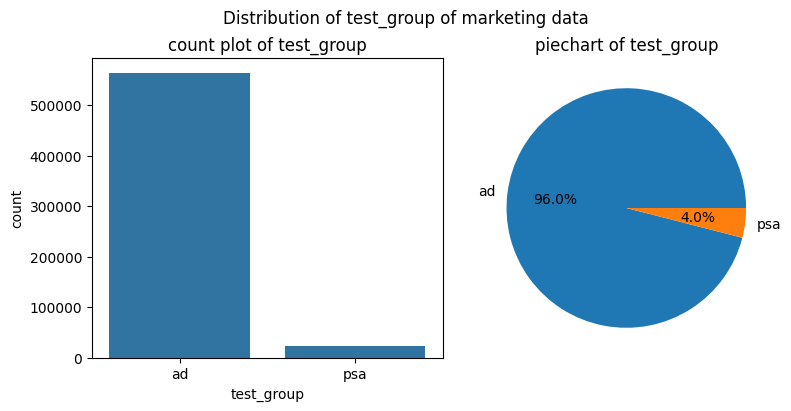

In [ ]:
#visualizing the data
fig, axs = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
fig.suptitle("Distribution of test_group of marketing data")

axs[0].set_title("count plot of test_group")
sns.countplot(data=categorical_data, x="test_group", ax=axs[0])


test_group_counts = categorical_data["test_group"].value_counts()
axs[1].set_title("piechart of test_group")
axs[1].pie(test_group_counts, labels=test_group_counts.index, autopct="%2.1f%%")


plt.show()



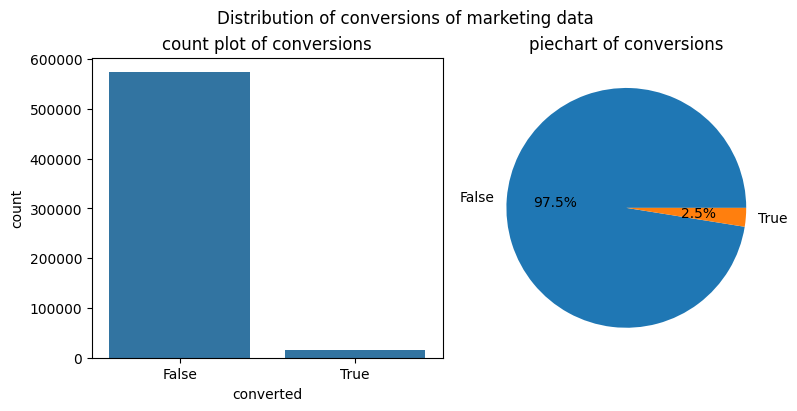

In [ ]:
#visualizing the data
fig, axs = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
fig.suptitle("Distribution of conversions of marketing data")

axs[0].set_title("count plot of conversions")
sns.countplot(data=categorical_data, x="converted", ax=axs[0])


conversions_counts = categorical_data["converted"].value_counts()
axs[1].set_title("piechart of conversions")
axs[1].pie(conversions_counts, labels=conversions_counts.index, autopct="%2.1f%%")


plt.show()



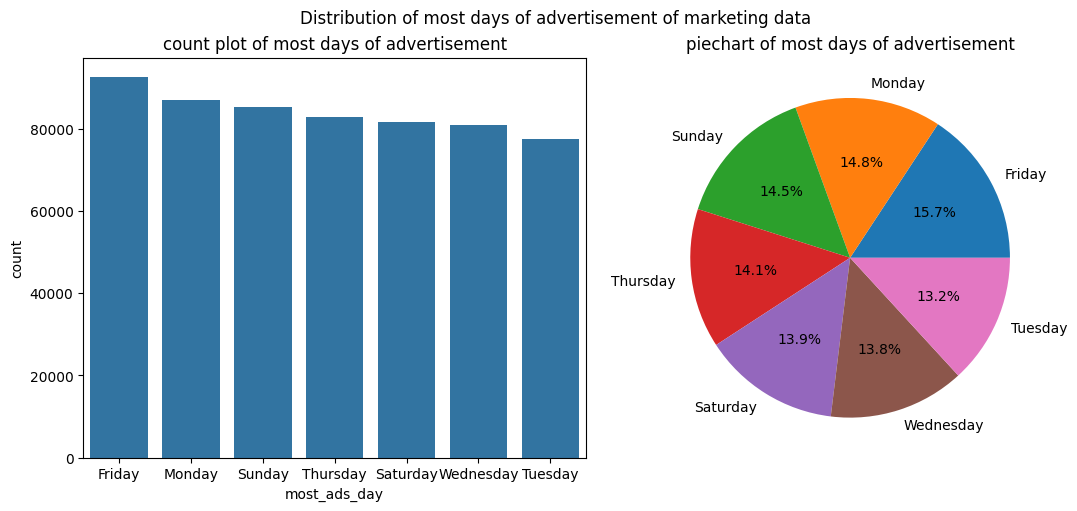

In [ ]:
#visualizing the data
fig, axs = plt.subplots(1,2, figsize=(11,5), constrained_layout=True)
fig.suptitle("Distribution of most days of advertisement of marketing data")

axs[0].set_title("count plot of most days of advertisement")
sns.countplot(data=categorical_data, x="most_ads_day", ax=axs[0], order=categorical_data["most_ads_day"].value_counts().index)


most_ads_days_counts = categorical_data["most_ads_day"].value_counts()
axs[1].set_title("piechart of most days of advertisement")
axs[1].pie(most_ads_days_counts, labels=most_ads_days_counts.index, autopct="%2.1f%%")


plt.show()



The distribution showed that days of advertisement affects the views of advertisemnet . The percentage of people that saw the adverts was greatest on Friday and least on Tuesday

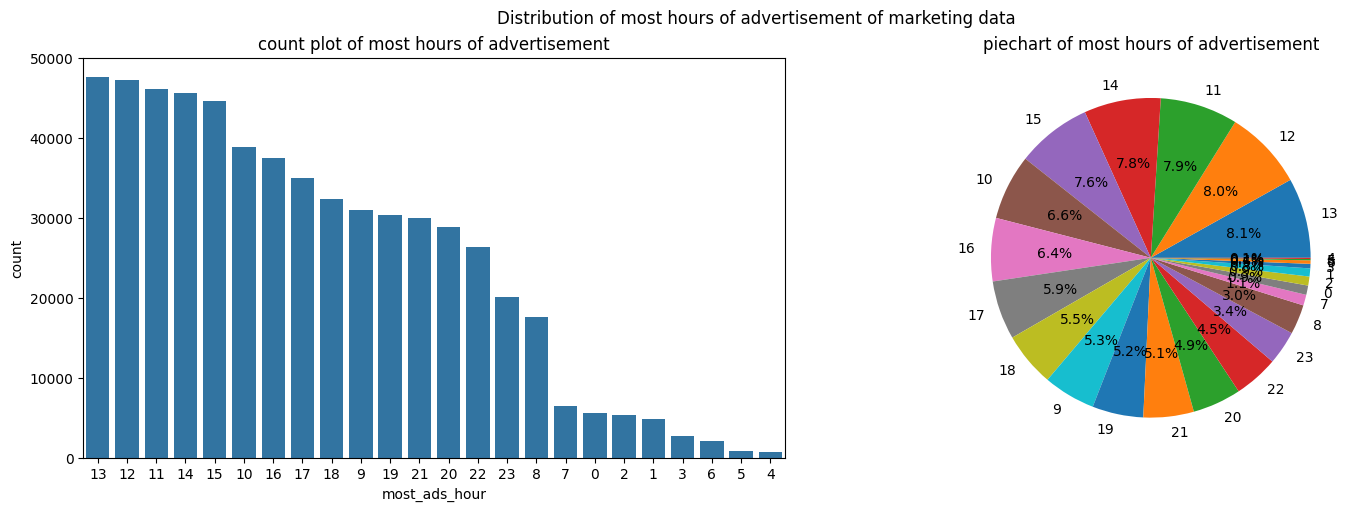

In [ ]:
#visualizing the data
fig, axs = plt.subplots(1,2, figsize=(15,5), constrained_layout=True)
fig.suptitle("Distribution of most hours of advertisement of marketing data")

axs[0].set_title("count plot of most hours of advertisement")
sns.countplot(data=categorical_data, x="most_ads_hour", order=categorical_data["most_ads_hour"].value_counts().index, ax=axs[0])


most_ads_hour_counts = categorical_data["most_ads_hour"].value_counts()
axs[1].set_title("piechart of most hours of advertisement")
axs[1].pie(most_ads_hour_counts, labels=most_ads_hour_counts.index, autopct="%2.1f%%")


plt.show()



The distribution showed that Time of advertisement affects the views of advertisemnet . The percentage of people that saw the adverts was greatest at 13:00 and least at 4:00

#Visual analysis of numerical data/continous data

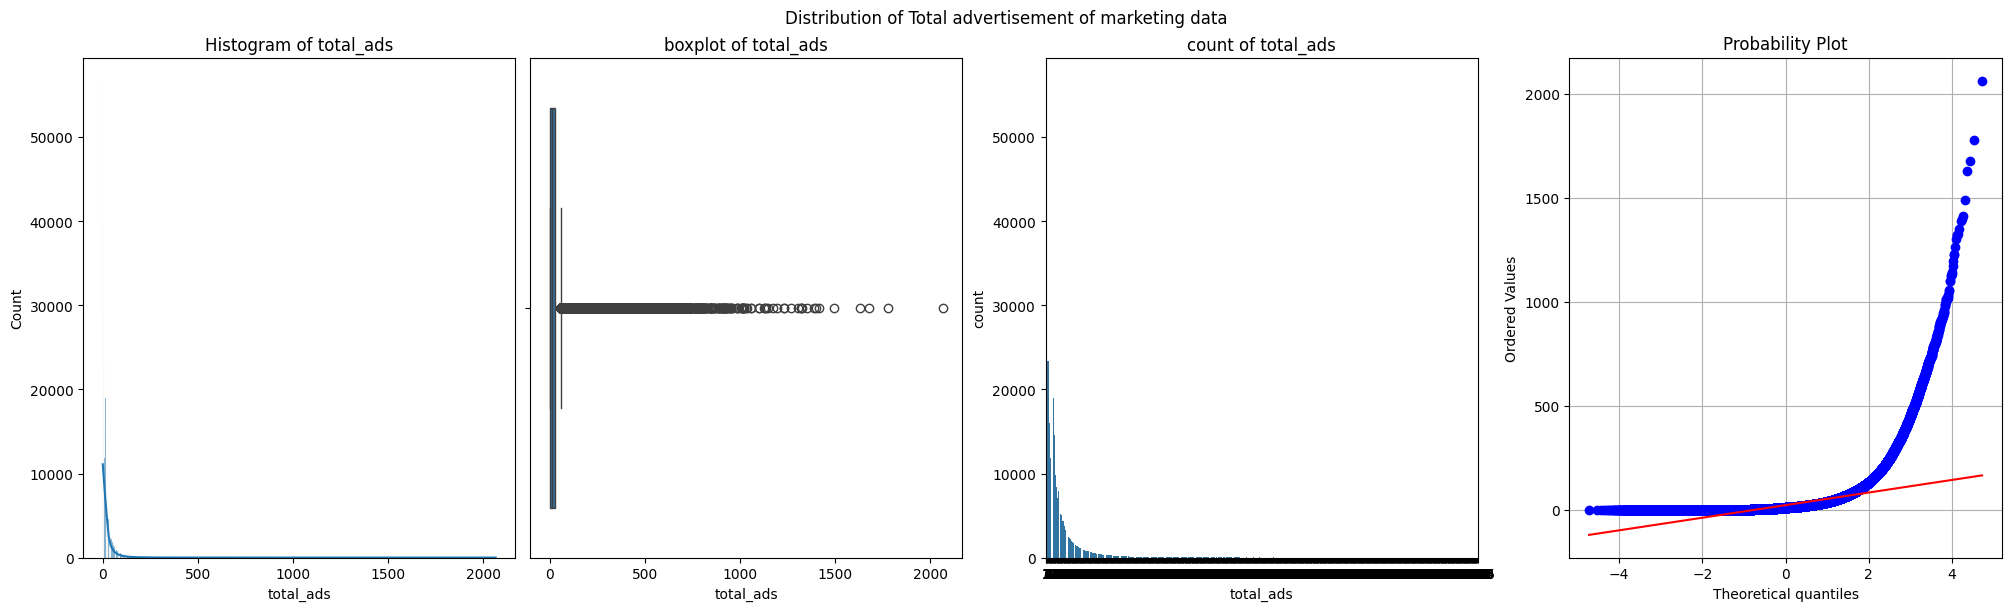

In [ ]:
#visualizing the data for total ads
fig, axs = plt.subplots(1,4, figsize=(20,6), constrained_layout=True)
fig.suptitle("Distribution of Total advertisement of marketing data")

axs[0].set_title("Histogram of total_ads")
sns.histplot(data=marketing_data, x="total_ads", kde=True, ax=axs[0])

axs[1].set_title("boxplot of total_ads")
sns.boxplot(data=marketing_data, x="total_ads", ax=axs[1])

axs[2].set_title("count of total_ads")
sns.countplot(data=marketing_data, x="total_ads", ax=axs[2])

stats.probplot(marketing_data["total_ads"], dist=stats.norm, plot=axs[3])
axs[3].grid()

plt.show()



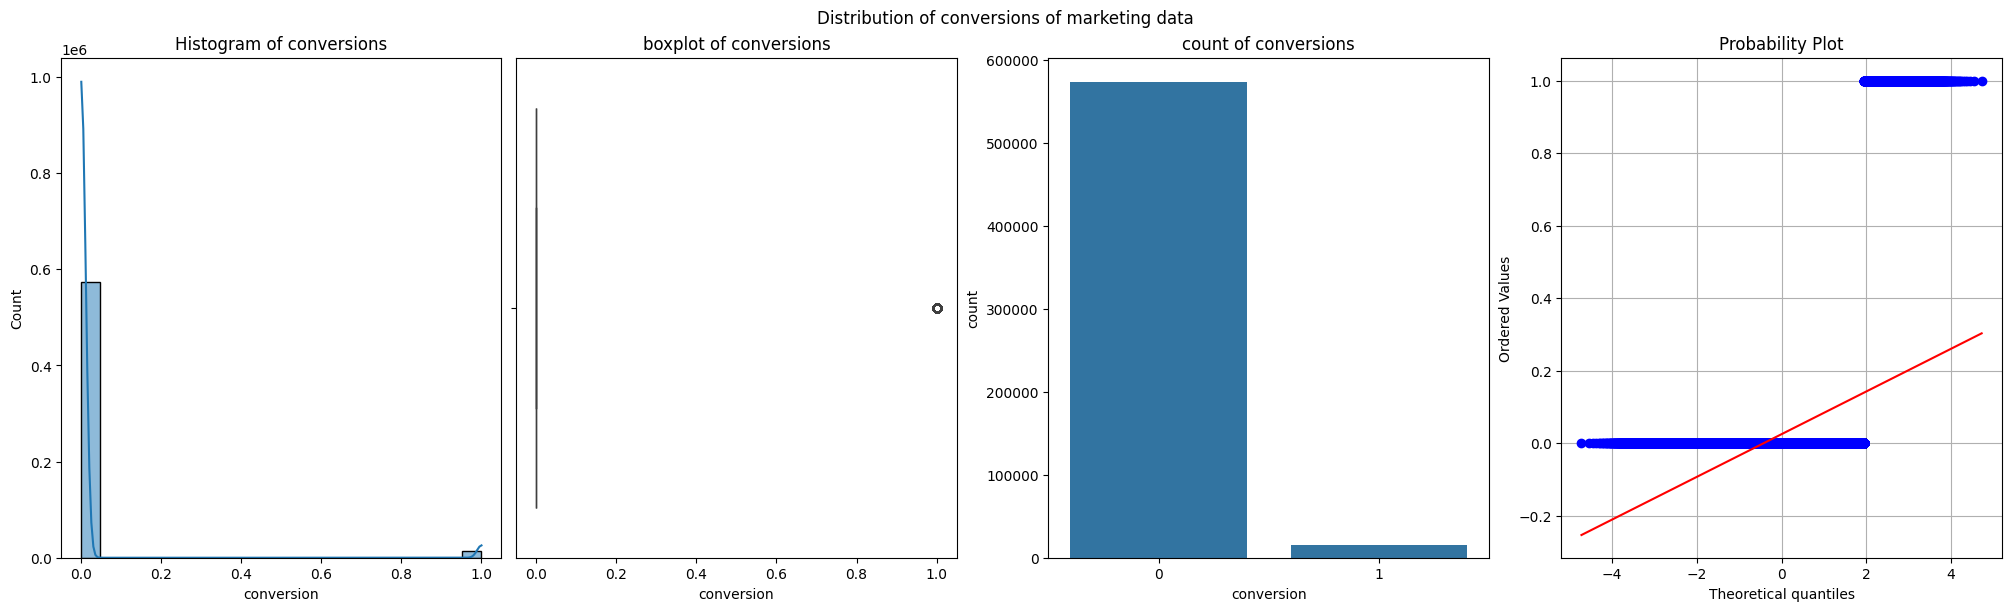

In [ ]:
#visualizing the data for conversion
fig, axs = plt.subplots(1,4, figsize=(20,6), constrained_layout=True)
fig.suptitle("Distribution of conversions of marketing data")

axs[0].set_title("Histogram of conversions")
sns.histplot(data=marketing_data, x="conversion", kde=True, ax=axs[0])

axs[1].set_title("boxplot of conversions")
sns.boxplot(data=marketing_data, x="conversion", ax=axs[1])

axs[2].set_title("count of conversions")
sns.countplot(data=marketing_data, x="conversion", ax=axs[2])

stats.probplot(marketing_data["conversion"], dist=stats.norm, plot=axs[3])
axs[3].grid()

plt.show()



Histogram:

The histogram shows the frequency of the data, with most of the total ads seen by each user below 2000, minimum ad seen was 1 and max 2065

Boxplot:

The data appears to have outliers which will be confirmed



In [ ]:
# finding the Q1 and Q2 for total ads
Q1 =marketing_data["total_ads"].quantile(0.25)
Q3 =marketing_data["total_ads"].quantile(0.75)


#finding the Inter Quartile range(IQR) for total ads
IQR = Q3 - Q1

#finding the lower limit for total ads
lower_limit = Q1 - 1.5*IQR

#finding the upper limit
upper_limit = Q3 + 1.5*IQR

#marketing data that is higher than the lower limit and lower than the upper limit
new_marketing_data= marketing_data[(marketing_data.total_ads>lower_limit) & (marketing_data.total_ads<upper_limit)]


new_marketing_data.head()




,test_group,converted,total_ads,most_ads_day,most_ads_hour,conversion
2,ad,False,21,Tuesday,18,0
7,ad,False,17,Sunday,18,0
8,ad,False,21,Tuesday,19,0
11,ad,False,47,Wednesday,13,0
12,ad,False,61,Tuesday,20,0


In [ ]:
new_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536044 entries, 2 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test_group     536044 non-null  object
 1   converted      536044 non-null  bool  
 2   total_ads      536044 non-null  int64 
 3   most_ads_day   536044 non-null  object
 4   most_ads_hour  536044 non-null  int64 
 5   conversion     536044 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 25.0+ MB


In [ ]:
#seperate new data into categorical and numerical data
categorical_data = new_marketing_data[["test_group", "converted", "most_ads_day", "most_ads_hour"]]

numerical_data = new_marketing_data[["total_ads", "conversion"]]

In [ ]:
new_marketing_data.groupby("test_group")["converted"].value_counts()

test_group  converted
ad          False        507827
            True           6889
psa         False         21102
            True            226
Name: count, dtype: int64

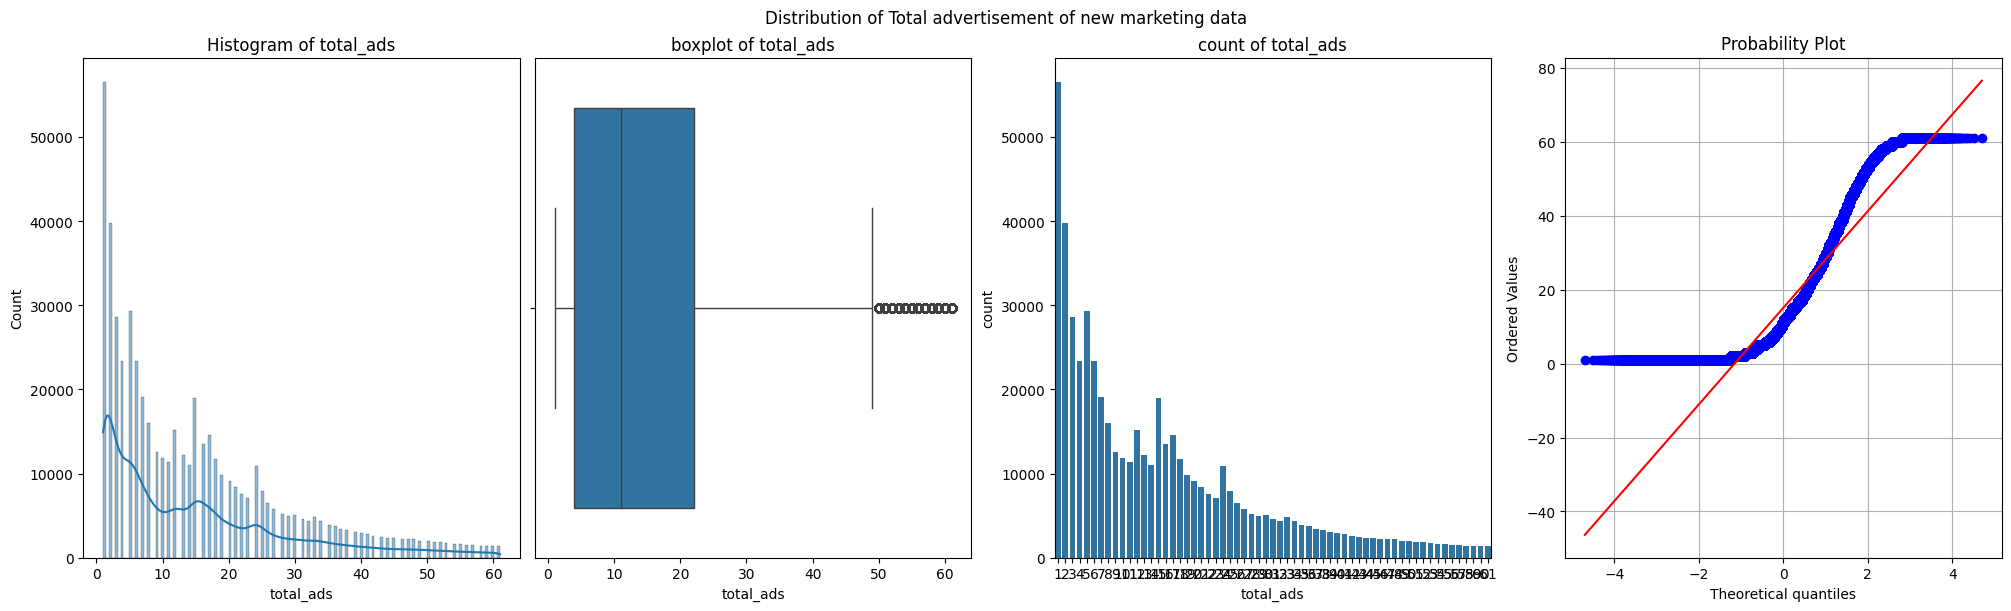

In [ ]:
#visualizing the data after outlier removal
fig, axs = plt.subplots(1,4, figsize=(20,6), constrained_layout=True)
fig.suptitle("Distribution of Total advertisement of new marketing data")

axs[0].set_title("Histogram of total_ads")
sns.histplot(data=new_marketing_data, x="total_ads", kde=True, ax=axs[0])

axs[1].set_title("boxplot of total_ads")
sns.boxplot(data=new_marketing_data, x="total_ads", ax=axs[1])

axs[2].set_title("count of total_ads")
sns.countplot(data=new_marketing_data, x="total_ads", ax=axs[2])

stats.probplot(new_marketing_data["total_ads"], dist=stats.norm, plot=axs[3])
axs[3].grid()

plt.show()



After removing outliers The data is more visually visible

Histogram:

The distribution of Total ads is skewed to the right. The data peaked at the beginning from 1 and declined continously till it got to lowest at over 60

In [ ]:
new_marketing_data["conversion"].describe()

,conversion
count,536044.000000
mean,0.013273
std,0.114442
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#correlation

correlation between total ads, most ads hour and conversion is:                total_ads  most_ads_hour  conversion
total_ads       1.000000      -0.003077    0.148006
most_ads_hour  -0.003077       1.000000    0.015574
conversion      0.148006       0.015574    1.000000


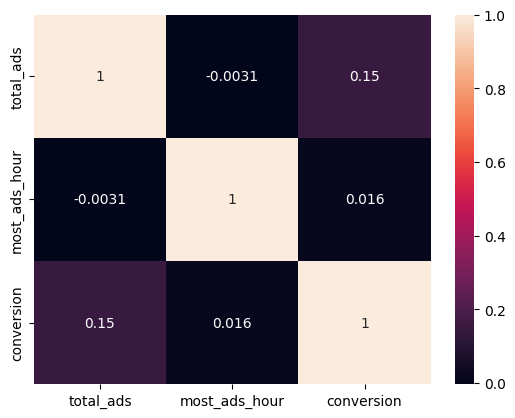

In [ ]:
numerical_columns = new_marketing_data.select_dtypes(include=["number"])


correlation_matrix =numerical_columns.corr()
print(f"correlation between total ads, most ads hour and conversion is: {correlation_matrix}")

sns.heatmap(correlation_matrix, annot=True)
plt.show()



conversion has a very strong positive correlation


There is a very weak to almost no correlation between total ads and most ad hour

In [ ]:
new_marketing_data[["total_ads", "conversion"]].describe()

,total_ads,conversion
count,536044.000000,536044.000000
mean,15.134015,0.013273
std,14.063618,0.114442
min,1.000000,0.000000
25%,4.000000,0.000000
50%,11.000000,0.000000
75%,22.000000,0.000000
max,61.000000,1.000000


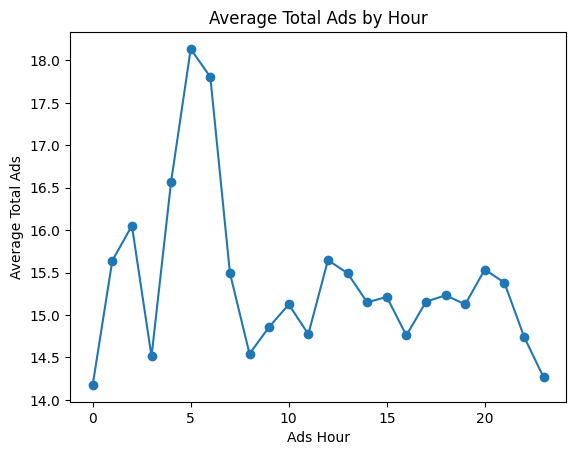

In [ ]:
#line plot
average_total_ads_by_hour = new_marketing_data.groupby("most_ads_hour")["total_ads"].mean()
plt.plot(average_total_ads_by_hour, marker="o")
plt.title("Average Total Ads by Hour")
plt.xlabel("Ads Hour")
plt.ylabel("Average Total Ads")
plt.show()

The total advertisement peaked at around 6:00

##Hypothesis Testing

1) Did the type of group(test_group) affect the conversion of people (converted)i.e whether been in experimental (advertisements)or control group(public service announcement or nothing) was instrumental to product purchase



Null hypothesis: The test_group affected the conversion of people leading to purchase of product thus causing a growth in revenue for the organisation



Alternative hypothesis:The test_group did not affect the conversion of people thus leading to no purchase






















#Statistical tests

In [ ]:
#alpha is significance level at 0.05(5%)
confidence_level = 0.95

alpha = 1- confidence_level

round(alpha, 3)

0.05

In [ ]:
def chi_square(freq_table, alpha):
    stat, p_value, dof, expected = stats.chi2_contingency(freq_table)

    print("stat=%3.f, p=%.3f" %(stat, p_value))

    if p_value < alpha:
      print("Reject the null hypothesis: There is a statistical significant differnce in conversion, The two samples are independent")
    else:
       print("Fail to Reject the null hypothesis or Accept the Alternative hypothesis: There is no statistical significance differnce in conversion The two samples are dependent")




In [ ]:
#contingency table
freq_table = pd.crosstab(new_marketing_data["test_group"], new_marketing_data["converted"])
freq_table

converted,False,True
test_group,,
ad,507827,6889
psa,21102,226


In [ ]:
chi_square(freq_table, alpha)

stat= 12, p=0.001
Reject the null hypothesis: There is a statistical significant differnce in conversion, The two samples are independent


## Analysis of the experimental and control group to determine if the advertisement was successful

In [ ]:
#Total number of conversion per group
N_ad = new_marketing_data[new_marketing_data["test_group"]== "ad"].shape[0]
N_psa = new_marketing_data[new_marketing_data["test_group"]== "psa"].shape[0]

#sum of conversion per group
X_ad = new_marketing_data.groupby("test_group")["conversion"].sum().loc["ad"]
X_psa = new_marketing_data.groupby("test_group")["conversion"].sum().loc["psa"]

print(new_marketing_data.groupby("test_group")["conversion"].sum())
print("Total number of users in experimental group(ad): ", N_ad)
print("Total number of users in control group(psa): ", N_psa)
print("Total number of purchase by users in experimental group(ad): ", X_ad)
print("Total number of purchase by users in control group(psa): ", X_psa)

test_group
ad     6889
psa     226
Name: conversion, dtype: int64
Total number of users in experimental group(ad):  514716
Total number of users in control group(psa):  21328
Total number of purchase by users in experimental group(ad):  6889
Total number of purchase by users in control group(psa):  226


In [ ]:
#probability of conversion/ average_conversion /mean of conversion
p_ad = X_ad/N_ad
p_psa = X_psa/N_psa

print("probability of conversion in experimental group(ad) ", p_ad )
print("probability of conversion in control group(ad) ", p_psa )


#probability of conversion in both groups
p_total = (X_ad + X_psa) / (N_ad + N_psa)

print("probability of conversion in both experimental and control groups: ", p_total)


probability of conversion in experimental group(ad)  0.013384079764374918
probability of conversion in control group(ad)  0.010596399099774943
probability of conversion in both experimental and control groups:  0.013273164143241973


#Revenue Primary metric is Conversion Rate


conversion rate = (Total number of purchase by users/Total number of users)*100

This is the estimate of potential revenue made by the marketing company.

The higher the conversion(purchase), from the adverts The higher the revenue generated

In [ ]:
#conversion rates
#conversion rate = (Total number of purchase by users/Total number of users)*100
conversion_rate_ad = (X_ad/N_ad) *100
conversion_rate_psa = (X_psa/N_psa) *100
conversion_rate_Total = (X_ad + X_psa)/(N_ad + N_psa) *100

print("conversion rate in experimental group: ", round(conversion_rate_ad,2), "%")
print("conversion rate in control group: ", round(conversion_rate_psa,2), "%")
print("conversion rate in both experimental and control group: ", round(conversion_rate_Total, 2), "%")

conversion rate in experimental group:  1.34 %
conversion rate in control group:  1.06 %
conversion rate in both experimental and control group:  1.33 %


From the above, The Experimental group had a greater percentage of conversion. Which means users in experimental group are likely to purchase the product than users in control group. This shows that Advertisemnt is a great way to increase revenue

In [ ]:
#variance of conversion
p_variance = p_total * (1-p_total) * (1/N_psa + 1/N_ad)

print("variance of probability of conversion is: ", p_variance)

variance of probability of conversion is:  6.39519871429244e-07


In [ ]:
#standard error / standard deviation of conversion
SE = np.sqrt(p_variance)

print("standard error is: ", SE)

standard error is:  0.000799699863342019


In [ ]:
#Z score for test statistic
z= (p_psa - p_ad)/SE

print("Test statistic for 2-sample z-test is: ", z)

Test statistic for 2-sample z-test is:  -3.4859086419622503


In [ ]:
#critical value of the z test
z_critical = norm.ppf(1-alpha/2)

print("critical value of the z test is: ", z_critical)

critical value of the z test is:  1.959963984540054


In [ ]:
#calculating the p_value
p_value = 2 *(1.0 -norm.cdf(abs(z)))


#defining the funtion
def statistical_significance(p_value, alpha):

  print(f"p_value of the 2-sample z_test:  {round(p_value, 3)}")

  if p_value < alpha:
    print("Reject the null hypothesis:There is no statistical significance difference, advertisement may have had a positive effect and was successful ")
  else:
    print("Fail to reject the null hypothesis,Accept alternative hypothesis:There is statistical significance difference, advertisement does not appear to have had an effect, ad was not successful")

statistical_significance(p_value, alpha)

p_value of the 2-sample z_test:  0.0
Reject the null hypothesis:There is no statistical significance difference, advertisement may have had a positive effect and was successful 


# Two tailed Test in Hypothesis testing

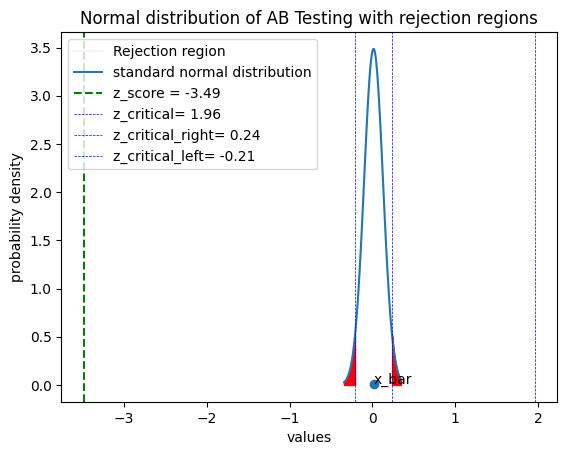

In [ ]:
#plotting standard normal distribution
mean = 0.01327
z= -3.4859         #z is test_statistic/z_score
std = 0.1144
x_min = -0.3432
x_max = 0.3432


x= np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim =(x_min, x_max)
plt.plot(x, y, color="red", alpha=0.05, label="Rejection region")
plt.plot(x,y, label="standard normal distribution")

z_critical_left = mean + (-z_critical * std)
z_critical_right = mean + (z_critical * std)

x1= np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="red")

x2= np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color="red")



plt.axvline(z, color="green", linestyle="dashed", label=f"z_score = {z:.2f}")
plt.axvline(z_critical, color="blue", linestyle="dashed", linewidth = 0.5, label=f"z_critical= {z_critical:.2f}")
plt.axvline(z_critical_right, color="blue", linestyle="dashed", linewidth = 0.5, label=f"z_critical_right= {z_critical_right:.2f}")
plt.axvline(z_critical_left, color="blue", linestyle="dashed", linewidth = 0.5, label=f"z_critical_left= {z_critical_left:.2f}")

plt.scatter(mean, 0.01327)
plt.annotate("x_bar", (mean, 0.01327))

plt.xlabel("values")
plt.ylabel("probability density")
plt.title("Normal distribution of AB Testing with rejection regions")
plt.legend()

plt.show()

The test statistic (z_score, -3.49)fall outside the shaded rejection region(it is within the rejection region). i.e it is less than the critical value -0.21,This shows that we can reject the null hypothesis. There is statistical significant difference . The advertisement appear to be effective

In [ ]:
if (np.abs(z) >  z_critical):
   print("Reject the null hypothesis:There is no statistical significance difference, advertisemnet appears to have had an effect, ad was successful")
else:
  print("Fail to reject the null hypothesis and accept tha alternative hypothesis, advertisement appears not to have had effect, ad was unsuccessful")





Reject the null hypothesis:There is no statistical significance difference, advertisemnet appears to have had an effect, ad was successful


##Results:
Statistical analysis using Python revealed a conversion rate of 1.34% in the experimental group, compared to 1.06% in the control group. A two-tailed Z-test indicated that this difference was statistically significant (p = 0.0, α = 0.05), allowing us to reject the null hypothesis of no difference between the groups. This finding supports the conclusion that the observed increase in conversions was attributable to the marketing intervention, rather than random variation.


##Limitations
User preferences can change over time e.g. promotion or competitor actions

Solution:

Use of machine learning in future




##Conclusion:
The results demonstrate that targeted marketing significantly improves user conversion rates. The increase in the conversion rate in the experimental condition suggests a meaningful return on investment for advertising expenditures. These findings highlight the strategic value of A/B testing in optimizing marketing efforts and staying competitive in meeting consumer expectations.

Data Analysis Tools:
- Programming Language: Python
- Descriptive Statistics: Mean, Median, Standard Deviation
- Inferential Statistics: Two-tailed Z-test, chi_2 test of independence
